# 데이터 전처리 기초
데이터 전처리에 사용되는 다양한 라이브러리를 소개한다.
> - missingno: 결측 데이터 검색
> - sklearn.impute: 결측 데이터 대체
> - patsy: 데이터 선택, 변환, 추가, 스케일링
> - sklearn.preprocessing: 스케일링, 변환

## missingno
실제 데이터를 수집하다보면 결측(missing)데이터가 생기기 마련이다. missingno패키지는 pandas 데이터 프레임에서 결측 데이터를 찾는 기능을 제공한다.

이 패키지를 사용하기 위해서는 데이터프레임에 결측 데이터가 ```NaN```값으로 저장되어있어야 한다.

In [3]:
from io import StringIO
import pandas as pd

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [7]:
# 판다스 자체에도 isnull() 또는 isna() 메서드롤 사용하면 결측 데이터의 위치를 알아내는 것이 가능하다
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [8]:
df.isna()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [9]:
# 하지만 데이터가 많은 경우에는 확인하기 힘들기 때문에 sum() 메서드를 결합하여 개수를 유추하는것이 가능하다.
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

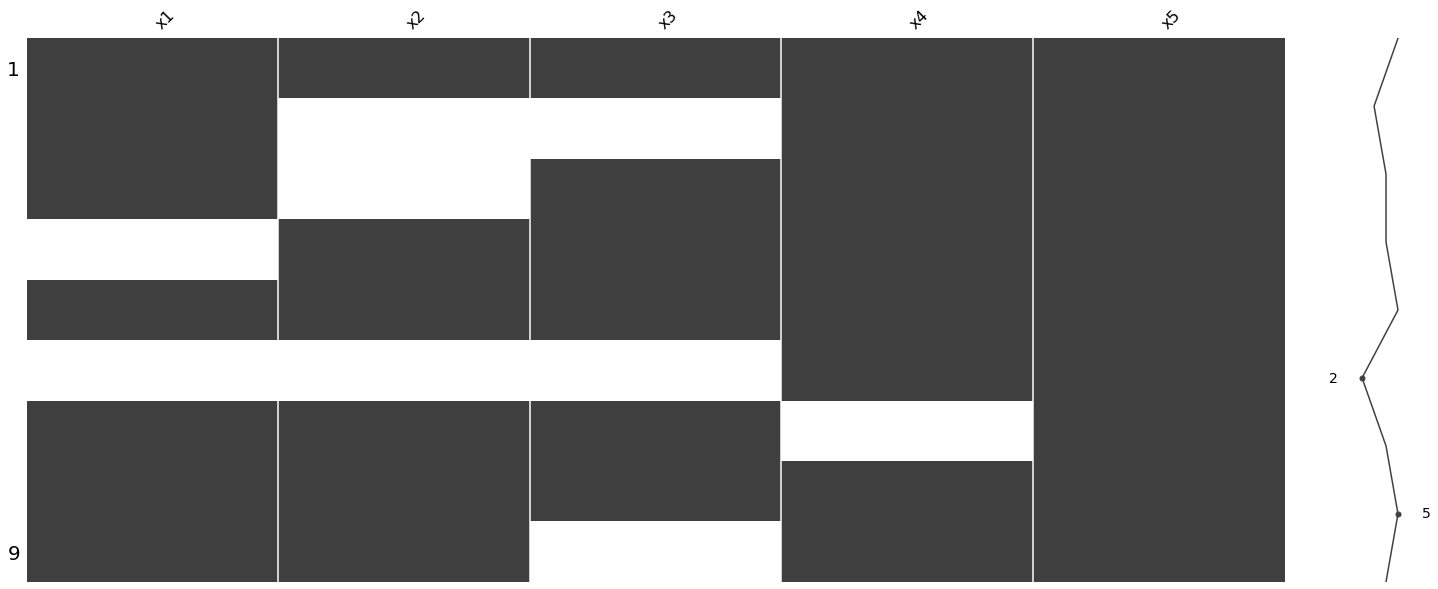

In [10]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

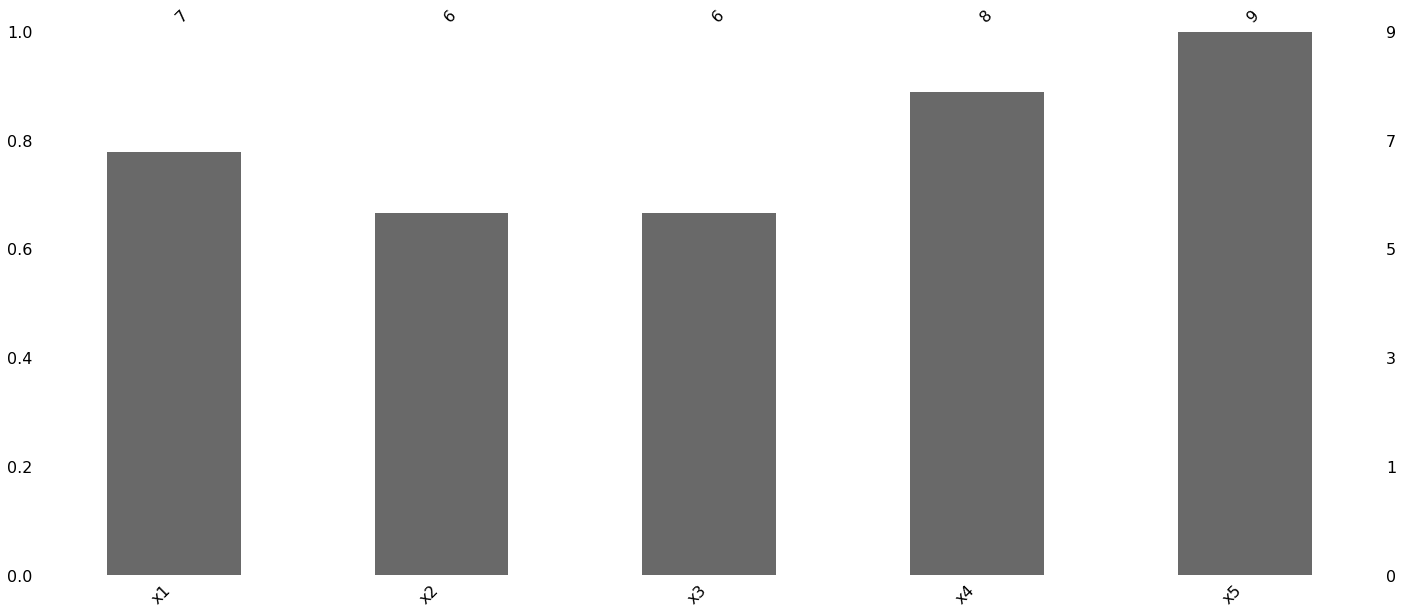

In [11]:
#막대바형식으로 출력
msno.bar(df)
plt.show()

In [15]:
# 안하면 seaborn import 할때 오류남
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


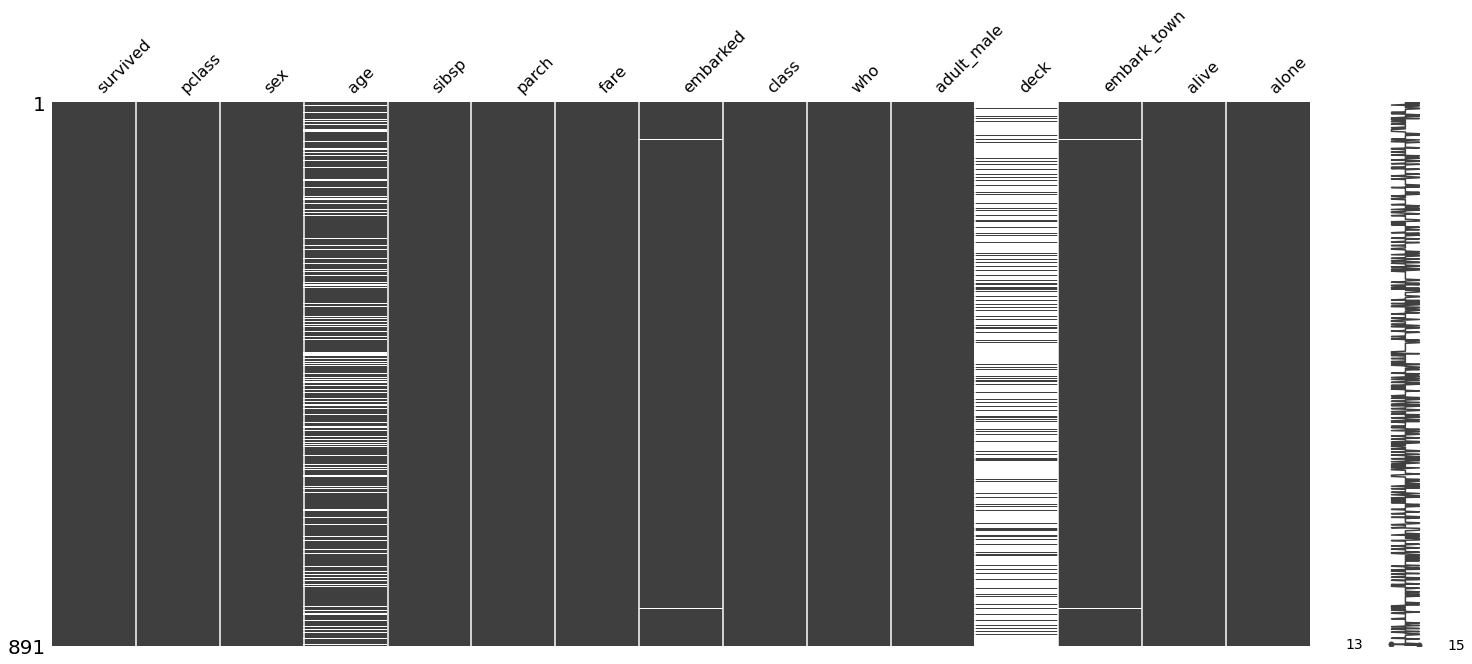

In [17]:
msno.matrix(titanic)
plt.show()

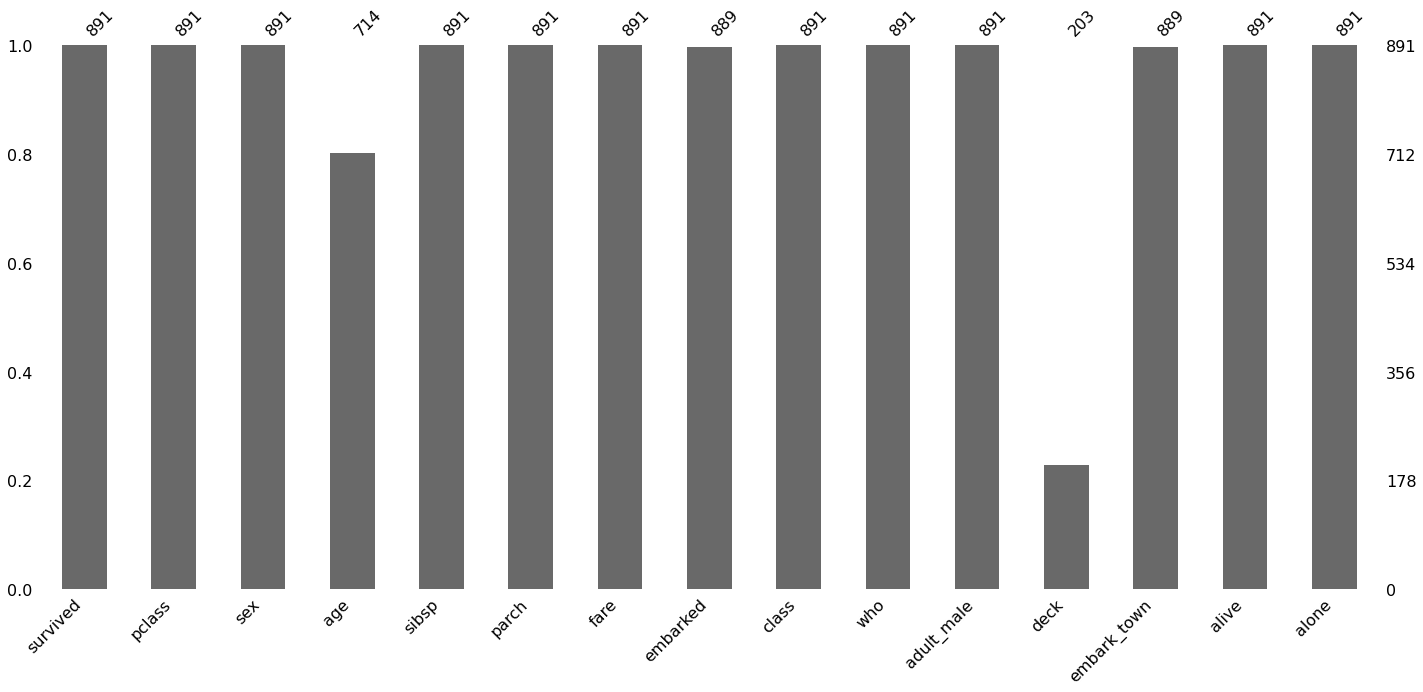

In [18]:
msno.bar(titanic)
plt.show()

결측 데이터는 2가지 방법으로 처리할 수 있는데
- 결측된 데이터가 너무 많은 경우 해당 데이터 열 전체를 삭제
- 결측된 데이터가 일부인 경우  가장 그럴 듯한 값으로 대체 - **결측데이터 대체(imputation)**

pandas ```dropna()```메서드 사용하여 결측데이터를 지울 수 있다.

#### 결측 데이터를 삭제할 경우

In [19]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [20]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [21]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


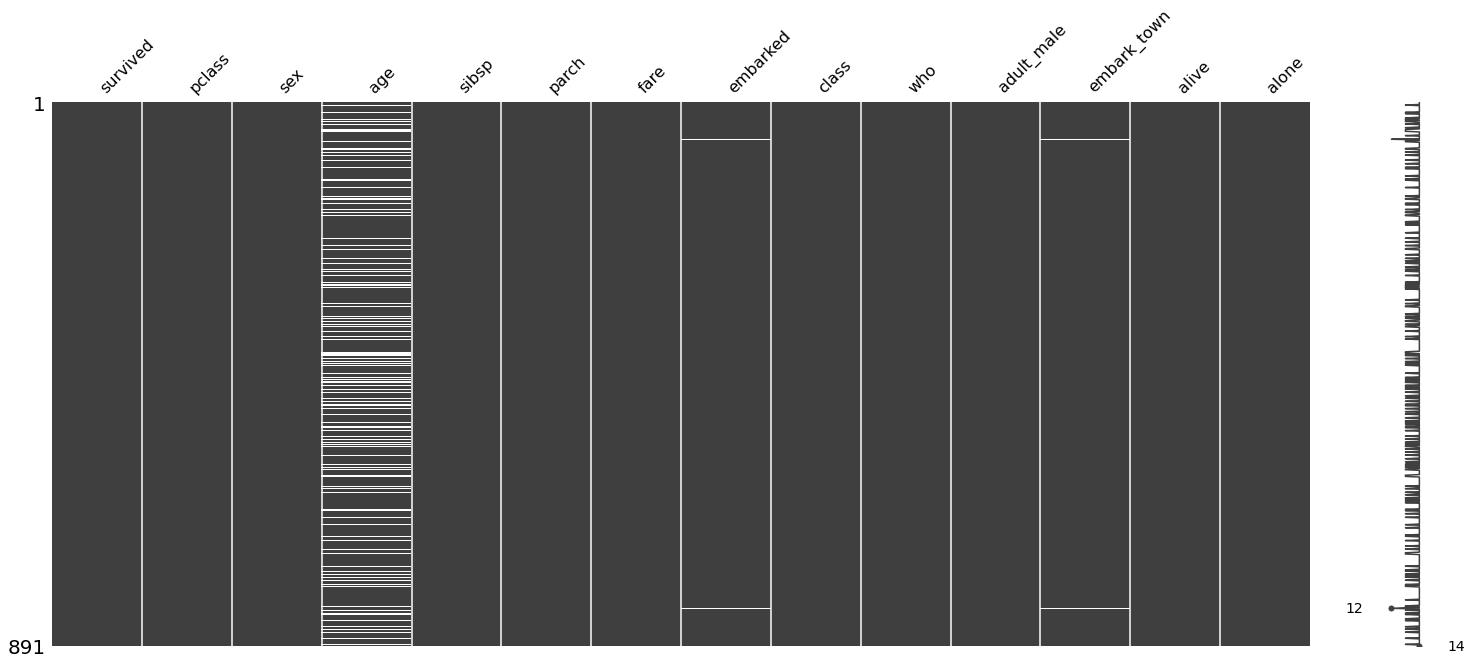

In [23]:
#데이터가 절반 이상 없는 열 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

#### 결측 데이터 대체

결측 데이터를 대체하는 경우에는 해당 열의 비결측 데이터의 평균값, 중앙값, 대체값으로 하여 채운다.
```scikit-learn```패키지의 ```SimpleImputer```클래스를 사용하여 대체한다.

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
ef = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s

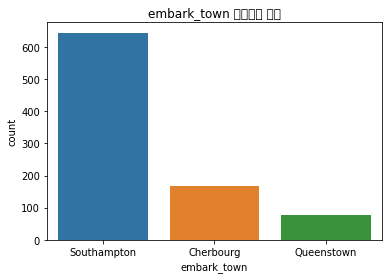

In [27]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show()

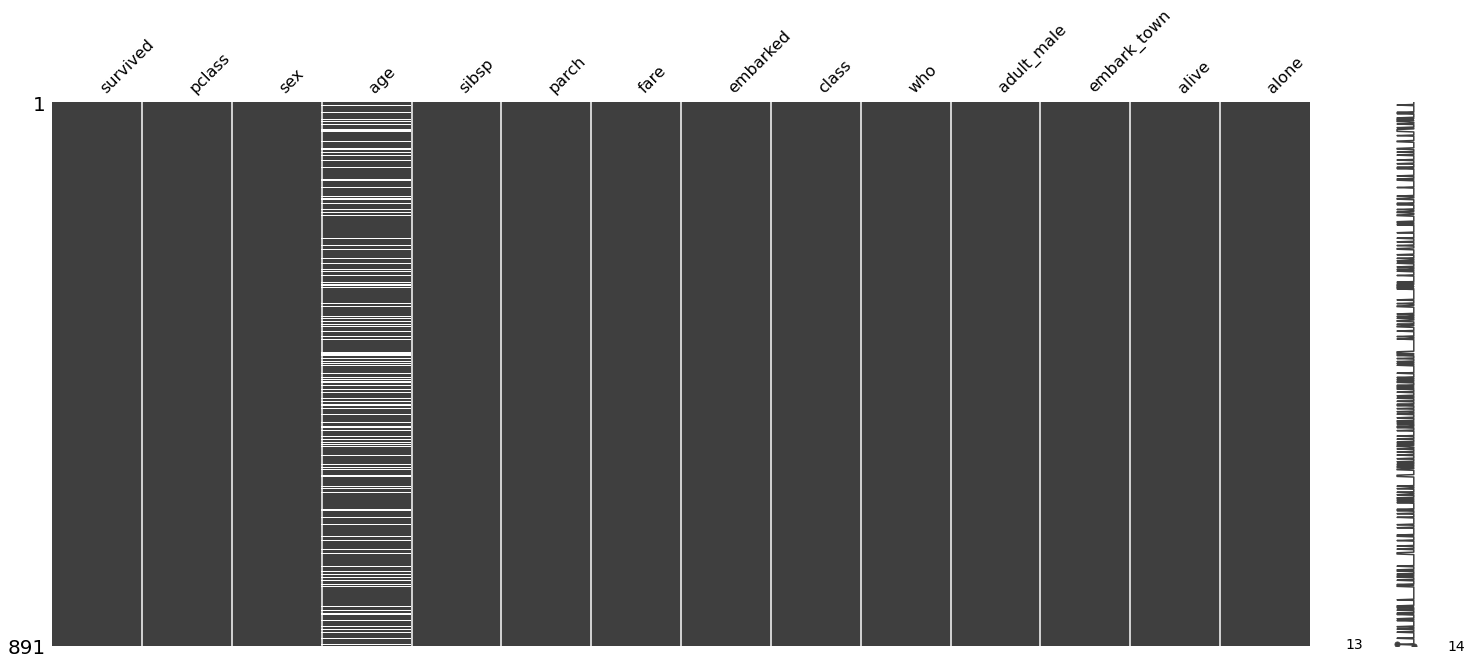

In [28]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/woung/workspace/general/ml-dl-study/데이터사이언스스쿨/venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Ru

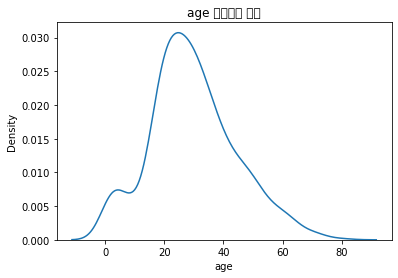

In [29]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

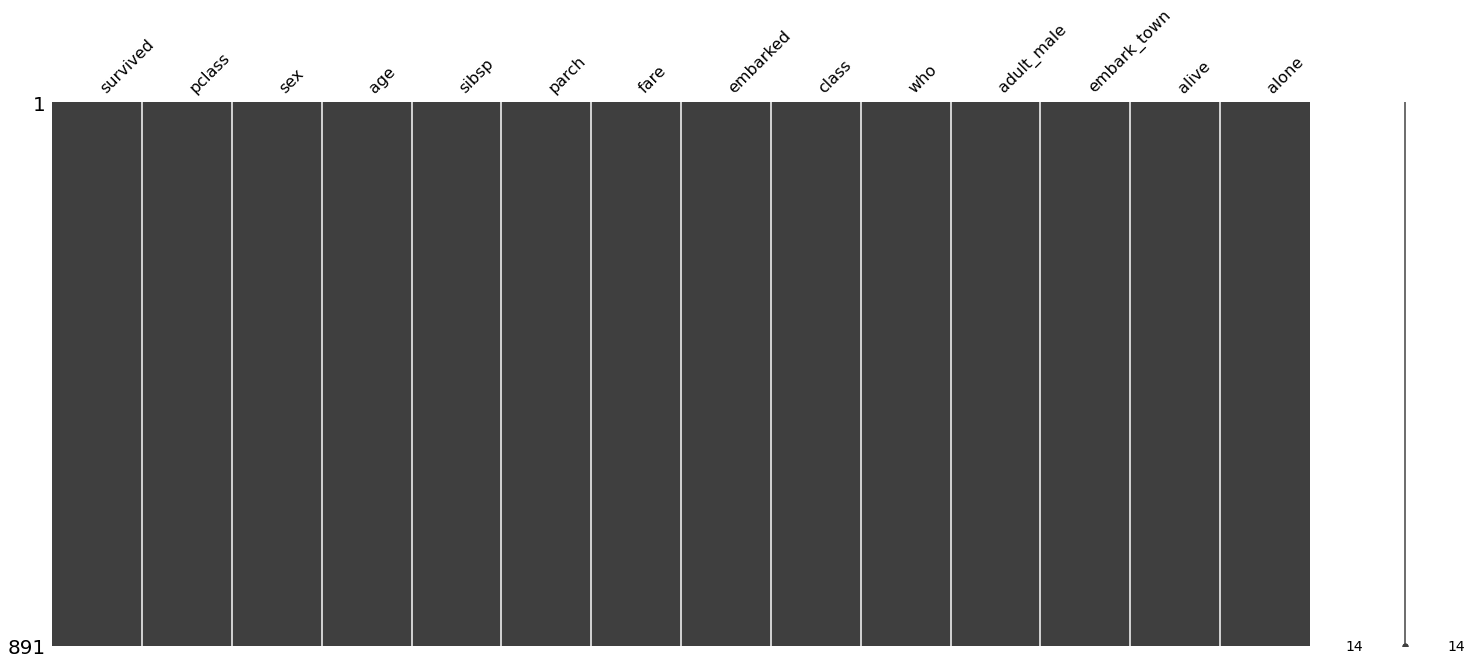

In [30]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()